In [1]:
# 📦 Install libraries
!pip install transformers
!pip install torch torchvision
!pip install pillow
!pip install git+https://github.com/salesforce/BLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from PIL import Image
import requests
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [4]:
from google.colab import files

# Upload image
uploaded = files.upload()
for filename in uploaded.keys():
    image = Image.open(filename).convert('RGB')

    # Generate caption
    inputs = processor(images=image, return_tensors="pt")
    output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)
    print("🖼️ Your Caption:", caption)


Saving 5s-musical-performance.jpg to 5s-musical-performance.jpg
Saving images.jpg to images.jpg
Saving Little-Girl-Playing-Golf-on-a-Field-Outdoor.jpg to Little-Girl-Playing-Golf-on-a-Field-Outdoor.jpg
🖼️ Your Caption: the orchestra of the university of chicago
🖼️ Your Caption: a young girl playing tennis
🖼️ Your Caption: a young girl playing golf on a green course


Saving 5s-musical-performance.jpg to 5s-musical-performance (1).jpg
Saving images.jpg to images (1).jpg
Saving Little-Girl-Playing-Golf-on-a-Field-Outdoor.jpg to Little-Girl-Playing-Golf-on-a-Field-Outdoor (1).jpg


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


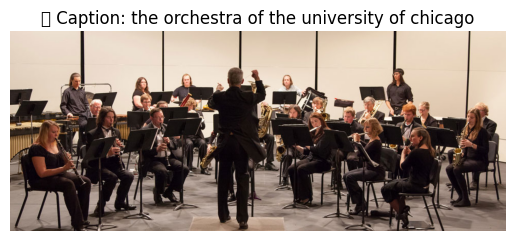

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


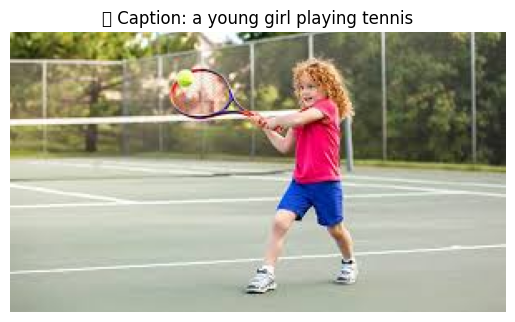

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


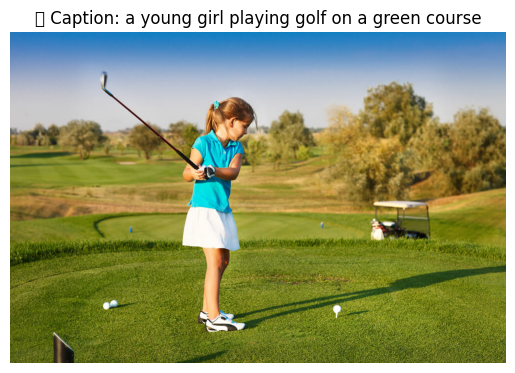

In [5]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import torch

# Upload image(s)
uploaded = files.upload()

# Loop through uploaded images
for filename in uploaded.keys():
    # 🖼️ Open and convert image
    image = Image.open(filename).convert('RGB')

    # 🧠 Generate caption
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)

    # 📸 Display image with caption
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"📝 Caption: {caption}", fontsize=12)
    plt.show()


Saving 5s-musical-performance.jpg to 5s-musical-performance (2).jpg
Saving hq720.jpg to hq720.jpg
Saving images.jpg to images (2).jpg
Saving Little-Girl-Playing-Golf-on-a-Field-Outdoor.jpg to Little-Girl-Playing-Golf-on-a-Field-Outdoor (2).jpg
Saving music-performance-student.jpg to music-performance-student.jpg
Saving photo_2025-06-20_09-28-23.jpg to photo_2025-06-20_09-28-23.jpg
Saving Popular-music-performance-degree.jpg to Popular-music-performance-degree.jpg
Saving ty.webp to ty.webp
Saving UFLRS.jpg to UFLRS.jpg
Saving Untitled.jpg to Untitled.jpg
Saving Warrior_Games_athletes_honored_at_Navy-Air_Force_football_game_141004-D-DB155-022.jpg to Warrior_Games_athletes_honored_at_Navy-Air_Force_football_game_141004-D-DB155-022.jpg


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


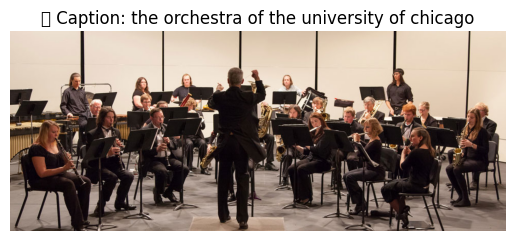

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


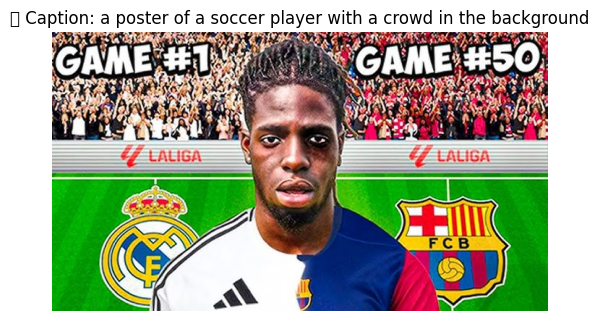

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


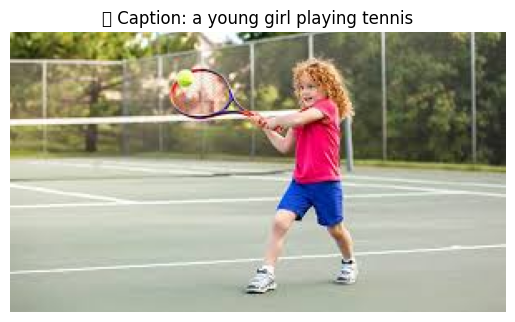

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


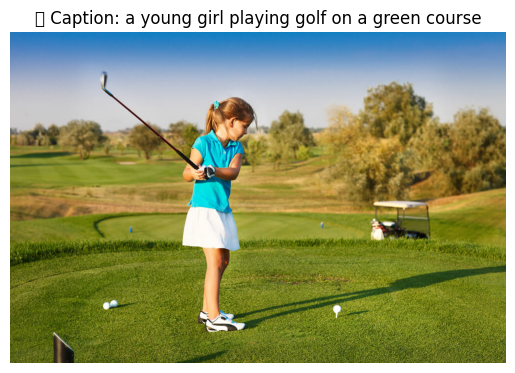

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


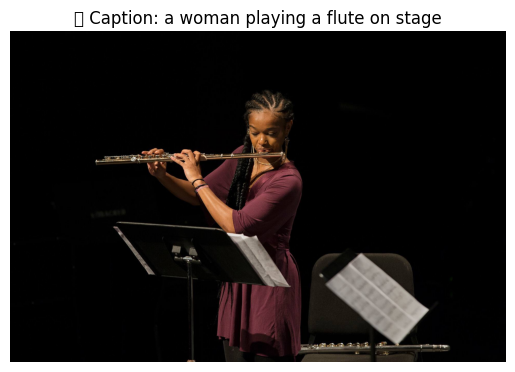

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


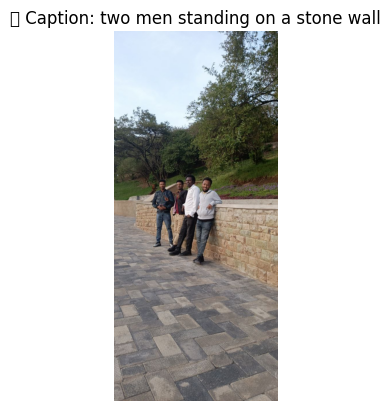

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


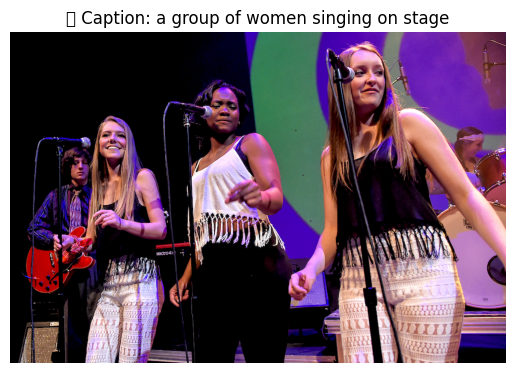

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


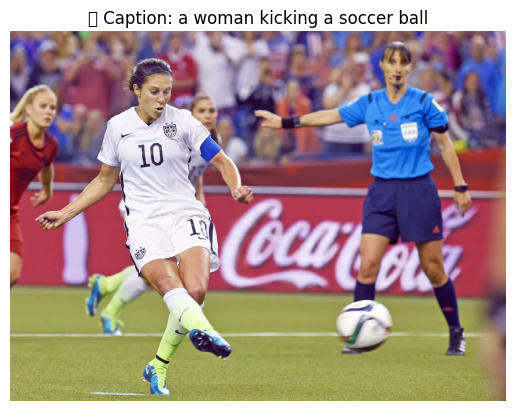

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


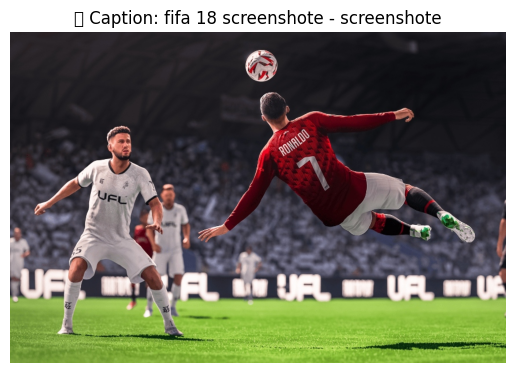

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


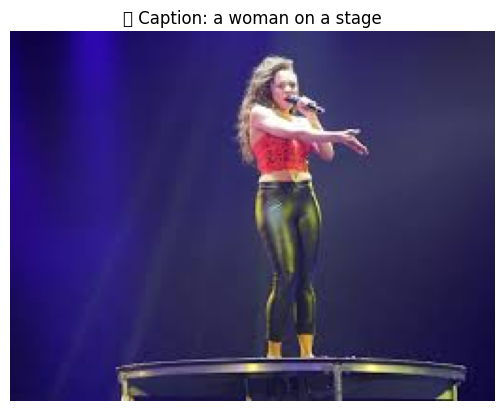

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


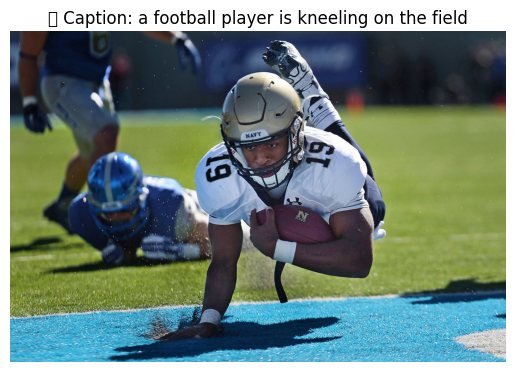

In [6]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import torch

# Upload image(s)
uploaded = files.upload()

# Loop through uploaded images
for filename in uploaded.keys():
    # 🖼️ Open and convert image
    image = Image.open(filename).convert('RGB')

    # 🧠 Generate caption
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)

    # 📸 Display image with caption
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"📝 Caption: {caption}", fontsize=12)
    plt.show()


In [7]:
!pip install gradio

import gradio as gr

def caption_image(img):
    inputs = processor(images=img, return_tensors="pt")
    output = model.generate(**inputs)
    return processor.decode(output[0], skip_special_tokens=True)

gr.Interface(fn=caption_image,
             inputs=gr.Image(type="pil"),
             outputs="text",
             title="🖼️ Image Caption Generator").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3449912cb9f10ab14a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
